# Cross-validation on simulated data

## (a) Generate data

In [59]:
import numpy as np

np.random.seed(0)

X = np.random.normal(size=100)
Y = -2*X**2 + X + np.random.normal(size=100)

The model here is 

$$Y = -2 X^2 + X + \epsilon$$

Where $X, \epsilon \sim \text{Normal}(0, 1)$. 

The sample size is $n=100$. Since we don't know polynomial regression yet, we have $p=2$, i.e. $X_1 = X, X_2 = X^2$. 

## (b) Scatter plot

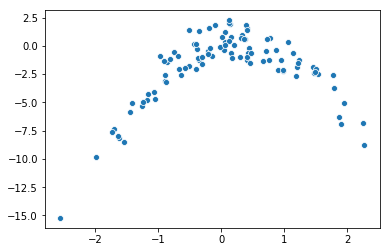

In [60]:
import seaborn as sns
%matplotlib inline

sns.scatterplot(X, Y)

## (c) LOOCV errors for various models

### Dataframe

In [68]:
import pandas as pd

data = pd.DataFrame({'const': len(X)*[1], 'X': X, 'Y': Y})
for i in range(2,5):
    data['X_' + str(i)] = X**i

data.head()

,const,X,Y,X_2,X_3,X_4
0,1,1.764052,-2.576558,3.111881,5.489520,9.683801
1,1,0.400157,-1.267853,0.160126,0.064075,0.025640
2,1,0.978738,-2.207603,0.957928,0.937561,0.917626
3,1,2.240893,-6.832915,5.021602,11.252875,25.216490
4,1,1.867558,-6.281111,3.487773,6.513618,12.164559


### Models

In [73]:
from sklearn.linear_model import LinearRegression

models = {}
models['deg1'] = LinearRegression(data[['const', 'X']], data['Y'])
models['deg2'] = LinearRegression(data[['const', 'X', 'X_2']], data['Y'])
models['deg3'] = LinearRegression(data[['const', 'X', 'X_2', 'X_3']], data['Y'])
models['deg4'] = LinearRegression(data[['const', 'X', 'X_2', 'X_3', 'X_4']], data['Y'])

### LOOCV errors

In [75]:
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()

errors = []

### Degree 1 model
X = data[['const', 'X']].values
y = data['Y'].values
y_pred = np.array([])

for train_index, test_index in loocv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    y_pred = np.append(y_pred, LinearRegression().fit(X_train, y_train).predict(X_test))

errors += [abs(y-y_pred).mean()]

### Degree 2 model
X = data[['const', 'X', 'X_2']].values
y = data['Y'].values
y_pred = np.array([])

for train_index, test_index in loocv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    y_pred = np.append(y_pred, LinearRegression().fit(X_train, y_train).predict(X_test))

errors += [abs(y-y_pred).mean()]

### Degree 3 model
X = data[['const', 'X', 'X_2', 'X_3']].values
y = data['Y'].values
y_pred = np.array([])

for train_index, test_index in loocv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    y_pred = np.append(y_pred, LinearRegression().fit(X_train, y_train).predict(X_test))

errors += [abs(y-y_pred).mean()]

### Degree 4 model
X = data[['const', 'X', 'X_2', 'X_3', 'X_4']].values
y = data['Y'].values
y_pred = np.array([])

for train_index, test_index in loocv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    y_pred = np.append(y_pred, LinearRegression().fit(X_train, y_train).predict(X_test))

errors += [abs(y-y_pred).mean()]

In [76]:
model_names = ['deg' + str(i) for i in range(1,5)]
errors_df = pd.DataFrame({'model': model_names, 'est_LOOCV_err': errors})
errors_df

,model,est_LOOCV_err
0,deg1,2.239087
1,deg2,0.904460
2,deg3,0.917489
3,deg4,0.925485


## (d) Repeat (c)

If we repeat (c) we don't get any difference, since LOOCV is deterministic.

### (e) Which model had the smallest error?

The degree 2 model had the smallest error. This is to be expected. Since the original data was generated by a degree 2, we expect a degree 2 model to have lower test error, and the LOOCV is an estimate of the test error

### (f) Hypothesis testing the coefficients

In [77]:
import statsmodels.formula.api as smf

smf.ols('Y ~ X', data=data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.9487,0.290,-6.726,0.000,-2.524,-1.374
X,0.8650,0.287,3.015,0.003,0.296,1.434


In [78]:
smf.ols('Y ~ X + X_2', data=data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1427,0.132,1.079,0.283,-0.120,0.405
X,1.1230,0.104,10.829,0.000,0.917,1.329
X_2,-2.0668,0.080,-25.700,0.000,-2.226,-1.907


In [79]:
smf.ols('Y ~ X + X_2 + X_3', data=data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1432,0.133,1.077,0.284,-0.121,0.407
X,1.1626,0.195,5.975,0.000,0.776,1.549
X_2,-2.0668,0.081,-25.575,0.000,-2.227,-1.906
X_3,-0.0148,0.061,-0.240,0.810,-0.137,0.107


In [80]:
smf.ols('Y ~ X + X_2 + X_3 + X_4', data=data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2399,0.153,1.563,0.121,-0.065,0.545
X,1.1207,0.197,5.691,0.000,0.730,1.512
X_2,-2.3116,0.212,-10.903,0.000,-2.732,-1.891
X_3,0.0049,0.063,0.078,0.938,-0.121,0.130
X_4,0.0556,0.045,1.248,0.215,-0.033,0.144


Observations:

- The degree 1 model fit a constant coeffient with high significance while the higher degree models didn't.
- The higher degree models all fit $X$ and $X^2$ coefficients with high significance but constant and higher degree coefficients with very low significance.

These results are consistent with the LOOCV error results, which suggested a second degree model was best. If we decide which predictors to reject based on these hypothesis tests, we would end up with a model

$$Y = \beta_1X + \beta_2X^2 + \epsilon $$

which is the form of the true model